# **GIỚI THIỆU**

Phân loại khách hàng là một toán quan trọng đối với bất kì doanh nghiệp nào. Phân loại khách hàng giúp doanh nghiệp xác định các đặc điểm chung giữa một số khách hàng, từ đó đề ra các chiến lược phù hợp đối với từng nhóm khách hàng. 

Sau đây, tôi sẽ thực hiện một mô hình K-Means Clustering để chia các nhóm khách hàng và rút ra đặc điểm chung của các khách hàng thuộc nhóm đấy.

# **IMPORTING LIBRARIES**

In [234]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from sklearn.cluster import KMeans

# **EXPLORING THE DATA**

In [235]:
data = pd.read_csv("Customer_Segmentation.csv")
data.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6


*   ID: Mã khách hàng
*   Gender: Giới tính
*   Ever_Married: Tình trạng hôn nhân
*   Age: Tuổi
*   Graduated: Trình độ học vấn (đã tốt nghiệp hay chưa?)
*   Profession: Nghiệp vụ
*   Work_Experience: Số năm kinh nghiệm
*   Spending_Score: Điểm chi tiêu của khách hàng
*   Family_Size: Số thành viên trong gia đình
*   Var_1: Hạng ẩn danh của khách hàng









In [236]:
data.shape

(8068, 10)

**Kích thước của tập dữ liệu:** 8068 hàng và 10 cột.

**Kiểm tra loại dữ liệu của từng cột:**

In [237]:
data.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object

Nhận xét: Dữ liệu có nhiều giá trị kiểu *object*. Chúng ta sẽ xử lý các feature này sau.

**Kiểm tra số giá trị đặc biệt của mỗi cột:**

In [238]:
data.nunique()

ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
dtype: int64

Ta có thể thấy rằng cột *ID* có số giá trị đặc biệt bằng với số hàng. Vì vậy chúng ta sẽ xóa cột *ID* ra khỏi dữ liệu.

In [239]:
data.drop(['ID'], inplace = True, axis = 1)

**Kiểm tra các giá trị NULL:**

In [240]:
data.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64

In [241]:
display(data.isnull().sum()/len(data))

Gender             0.000000
Ever_Married       0.017353
Age                0.000000
Graduated          0.009668
Profession         0.015369
Work_Experience    0.102752
Spending_Score     0.000000
Family_Size        0.041522
Var_1              0.009420
dtype: float64

Nhận xét: Một số feature tồn tại các giá trị NULL. Tùy vào từng feature, chúng ta sẽ có các cách xử lý vấn đề này khác nhau.

**Mô tả dữ liệu mức cơ bản**

In [242]:
data.describe(percentiles = [.1, .25, .5, .75, .97])

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
10%,25.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
97%,82.000000,10.000000,6.000000
max,89.000000,14.000000,9.000000


# **DATA VISUALIZATION**

In [243]:
data.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6
7,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6
8,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7
9,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6


In [244]:
data.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object

In [245]:
numeric = data.select_dtypes(exclude=object).columns
category = data.select_dtypes(include=object).columns

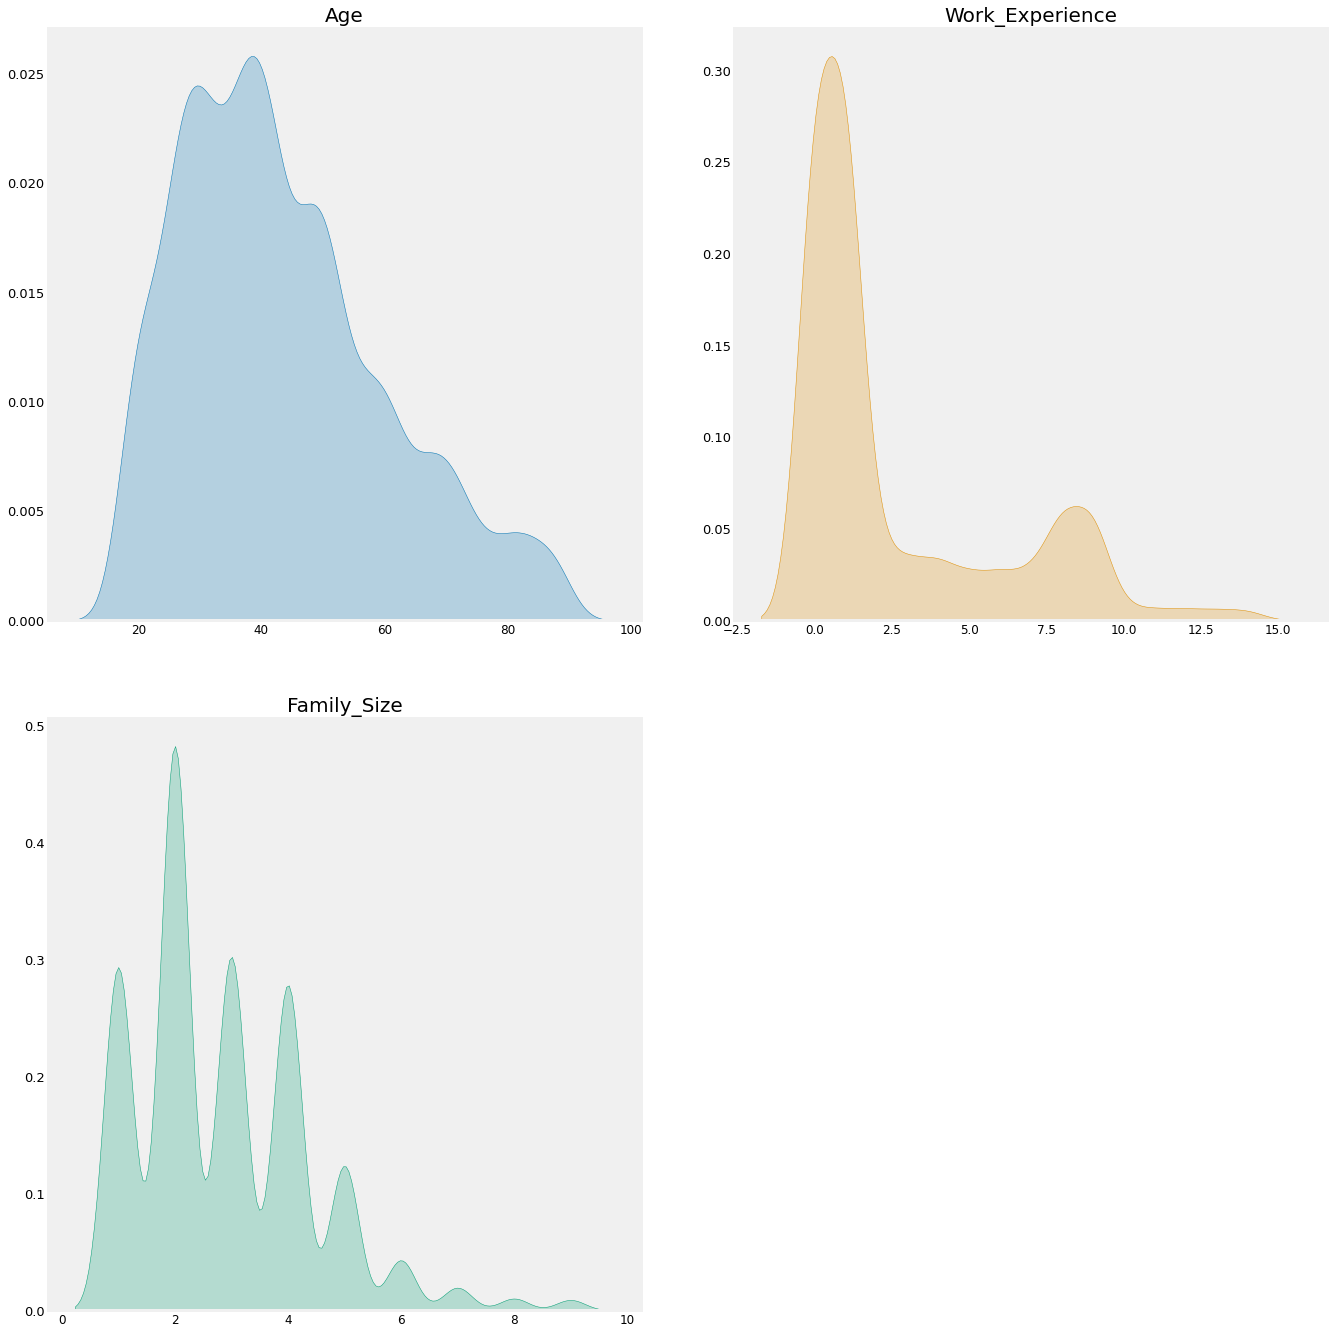

In [246]:
fig, ax = plt.subplots(figsize =(20, 20))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12

colors = sns.color_palette("colorblind", n_colors = 5).as_hex()

for i in (enumerate(numeric)):
    plt.subplot(2, 2, i[0]+1)
    sns.kdeplot(x = i[1], data = data, color = colors[i[0]], fill=True)
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=13, color='black')
    # plt.box(False)
    plt.title(i[1], fontsize=20, color='black')
    plt.tight_layout(pad=5.0)
    plt.grid(b=None)

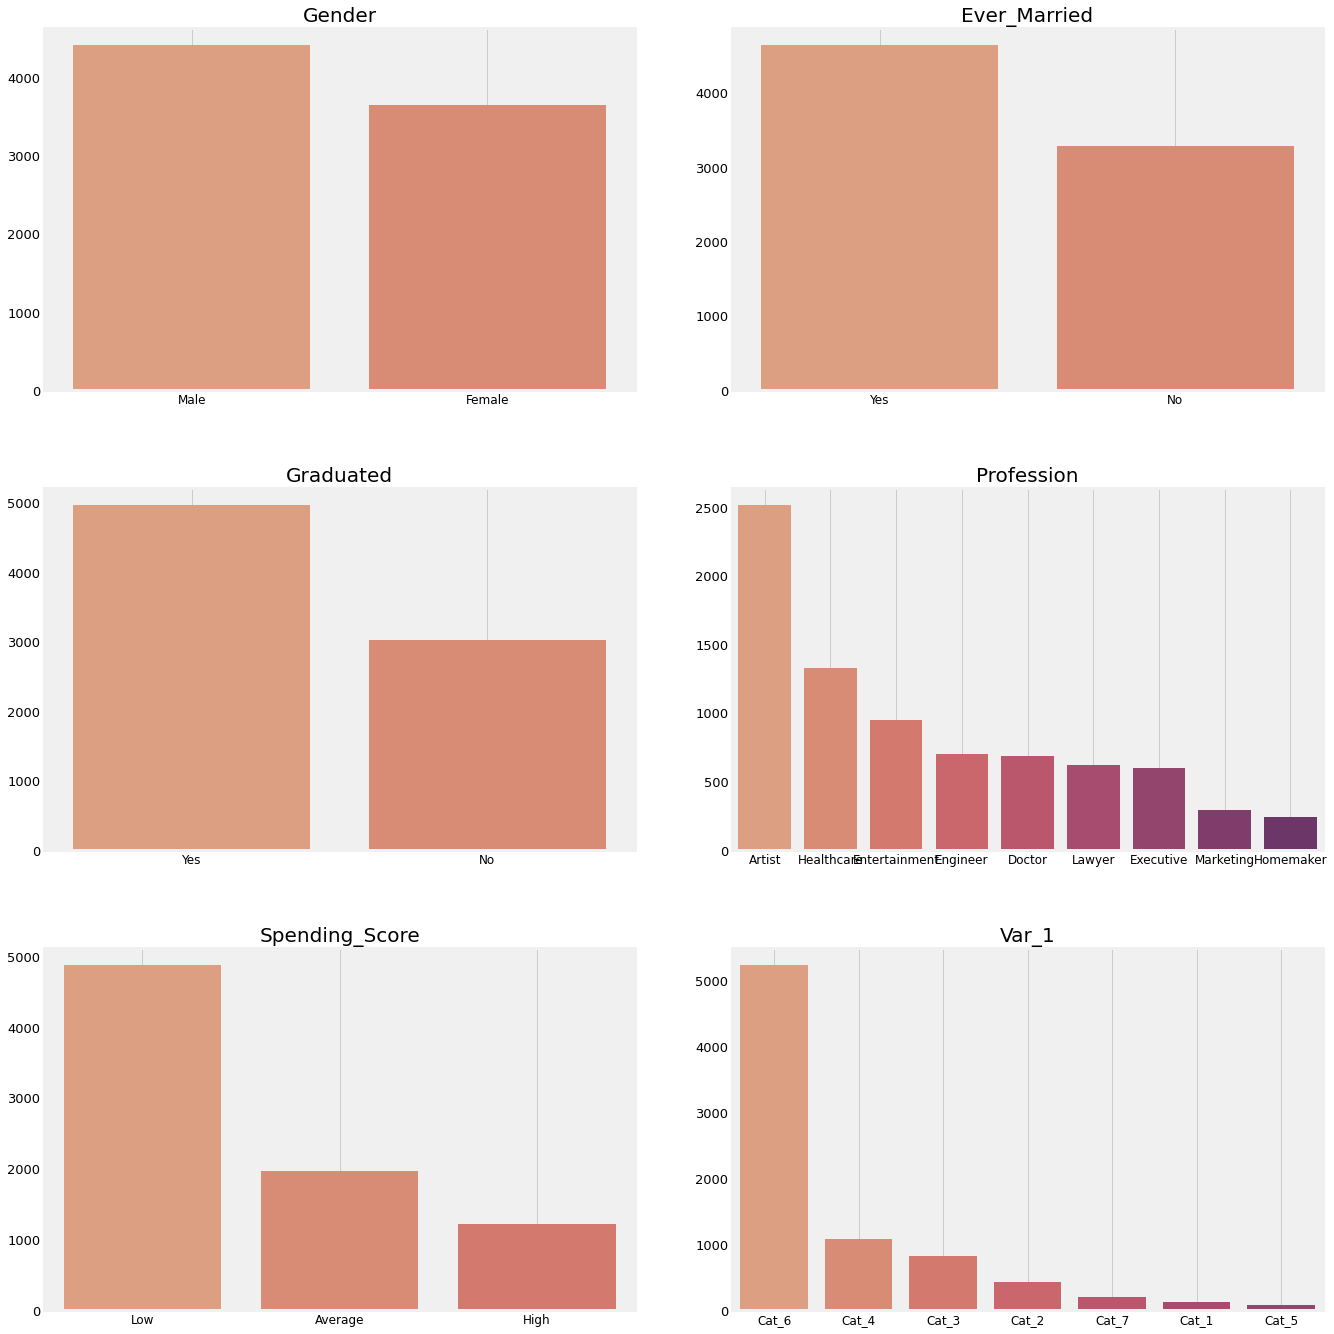

In [247]:
fig, ax = plt.subplots(figsize =(20, 20))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12

colors = sns.color_palette("flare", n_colors = 10).as_hex()

for i in (enumerate(category)):
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = data, order=data[i[1]].value_counts().index, palette = colors, fill=True)
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=13, color='black')
    # plt.box(False)
    plt.title(i[1], fontsize=20, color='black')
    plt.tight_layout(pad=5.0)
    plt.grid(b=None)

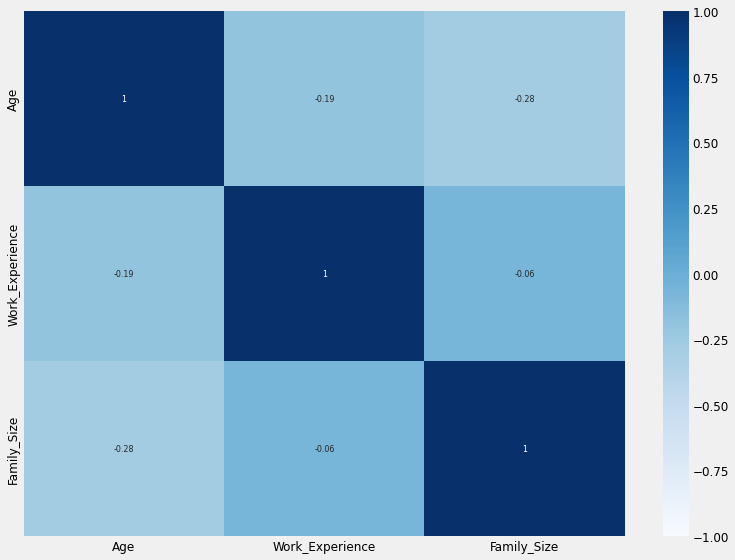

In [248]:
plt.figure(figsize=(12,9))
correlations = data.corr()
sns.heatmap(round(correlations,2), cmap='Blues', annot=True, 
            annot_kws={"size": 8}, vmin=-1, vmax=1);

In [249]:
data.columns


Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

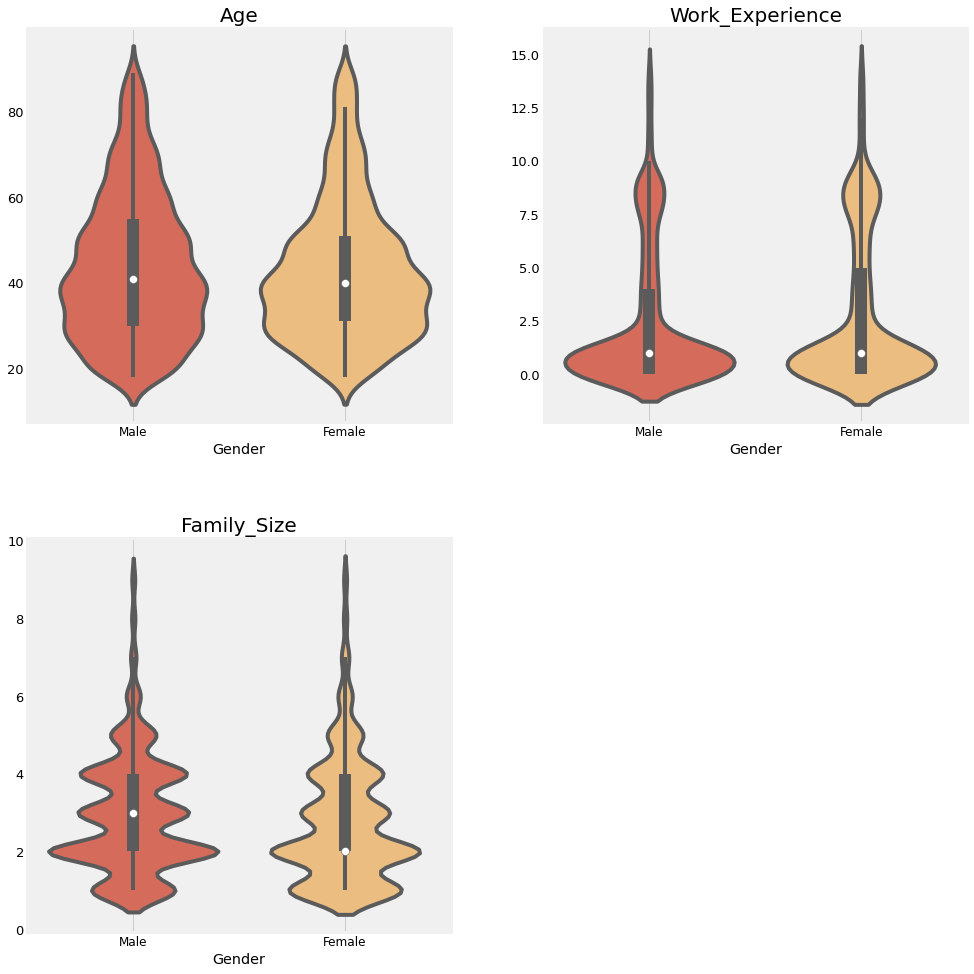

In [250]:
fig, ax = plt.subplots(figsize =(15, 15))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12

colors = sns.color_palette("Spectral", n_colors = 5).as_hex()

for i in (enumerate(numeric)):
    plt.subplot(2, 2, i[0]+1)
    sns.violinplot(x='Gender', y=i[1], palette = colors, data=data)
    plt.xlabel('Gender')
    plt.ylabel('')
    plt.yticks(fontsize=13, color='black')
    plt.title(i[1], fontsize=20, color='black')
    plt.tight_layout(pad=5.0)
    plt.grid(b=None)

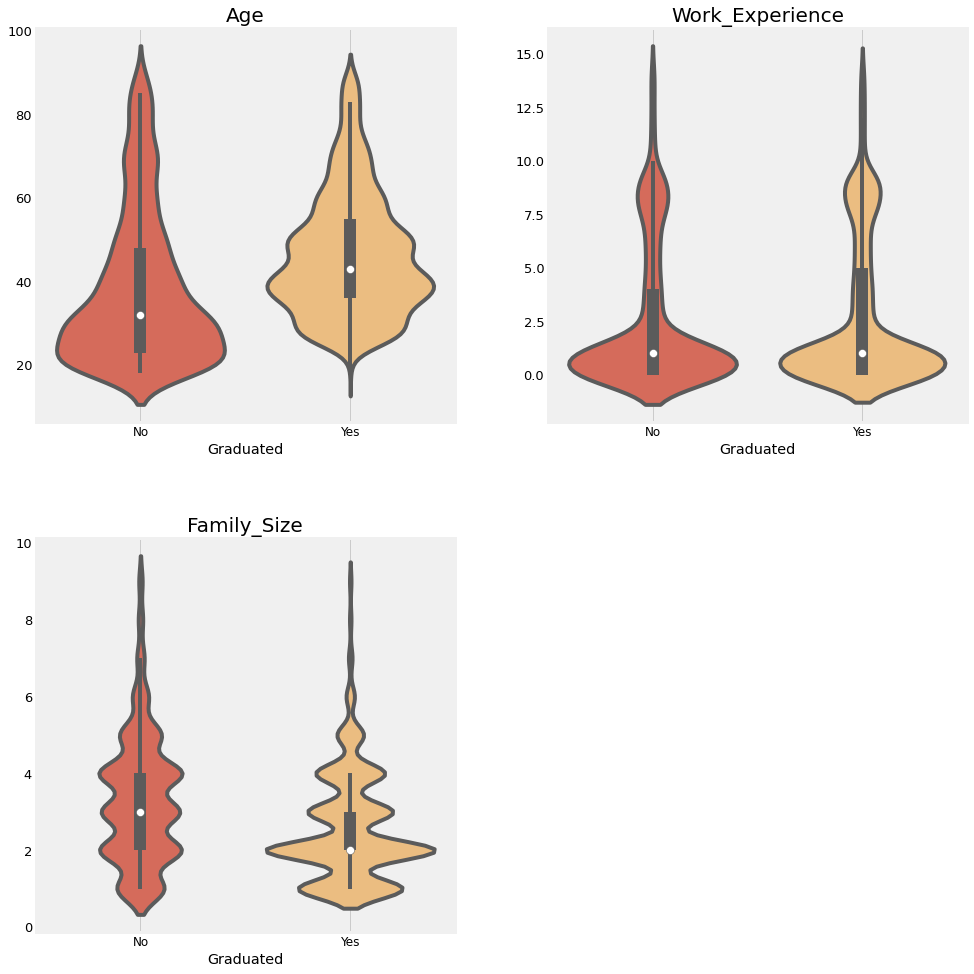

In [251]:
fig, ax = plt.subplots(figsize =(15, 15))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12

colors = sns.color_palette("Spectral", n_colors = 5).as_hex()

for i in (enumerate(numeric)):
    plt.subplot(2, 2, i[0]+1)
    sns.violinplot(x='Graduated', y=i[1], palette = colors, data=data)
    plt.xlabel('Graduated')
    plt.ylabel('')
    plt.yticks(fontsize=13, color='black')
    plt.title(i[1], fontsize=20, color='black')
    plt.tight_layout(pad=5.0)
    plt.grid(b=None)

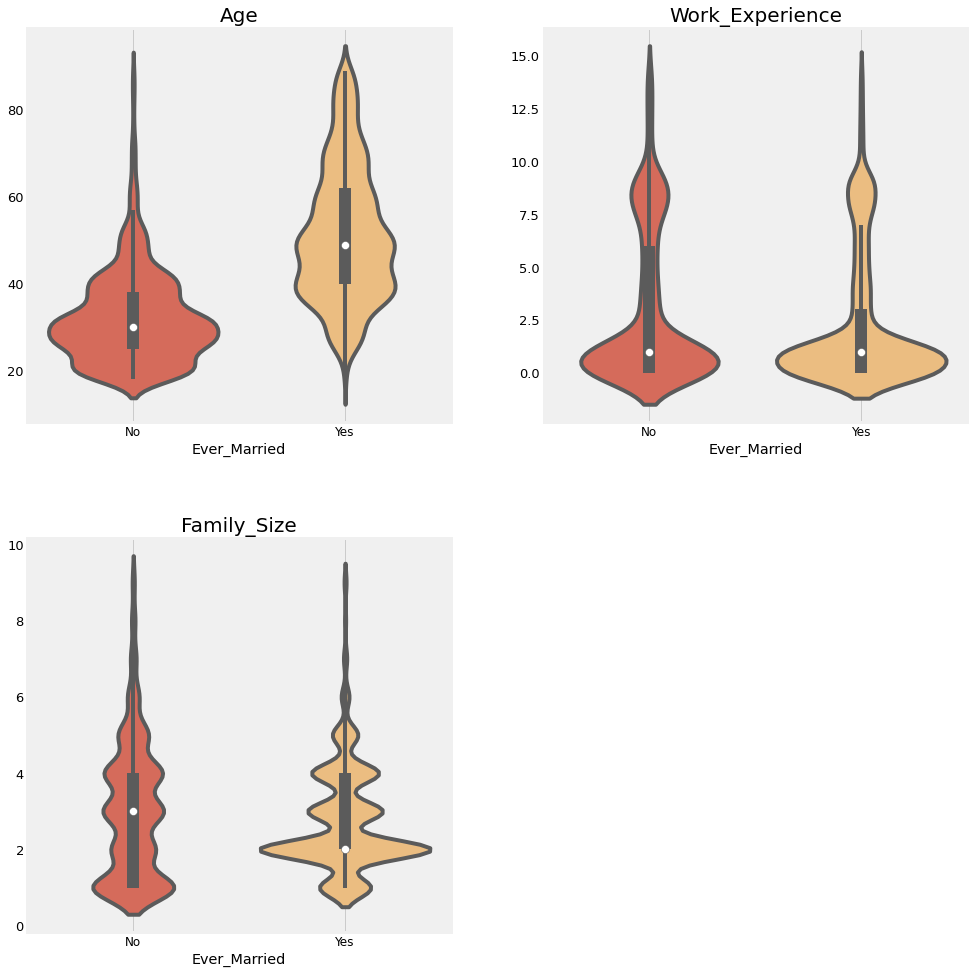

In [252]:
fig, ax = plt.subplots(figsize =(15, 15))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12

colors = sns.color_palette("Spectral", n_colors = 5).as_hex()

for i in (enumerate(numeric)):
    plt.subplot(2, 2, i[0]+1)
    sns.violinplot(x='Ever_Married', y=i[1], palette = colors, data=data)
    plt.xlabel('Ever_Married')
    plt.ylabel('')
    plt.yticks(fontsize=13, color='black')
    plt.title(i[1], fontsize=20, color='black')
    plt.tight_layout(pad=5.0)
    plt.grid(b=None)

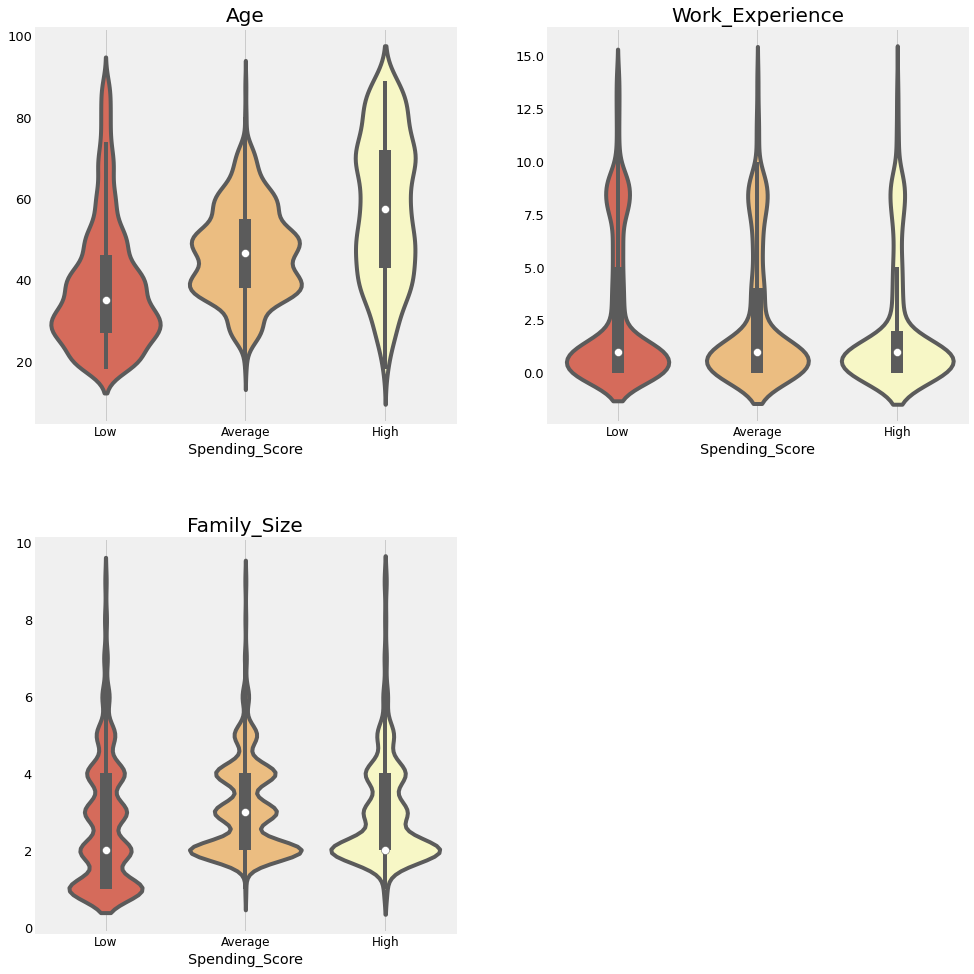

In [253]:
fig, ax = plt.subplots(figsize =(15, 15))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12

colors = sns.color_palette("Spectral", n_colors = 5).as_hex()

for i in (enumerate(numeric)):
    plt.subplot(2, 2, i[0]+1)
    sns.violinplot(x='Spending_Score', y=i[1], palette = colors, data=data)
    plt.xlabel('Spending_Score')
    plt.ylabel('')
    plt.yticks(fontsize=13, color='black')
    plt.title(i[1], fontsize=20, color='black')
    plt.tight_layout(pad=5.0)
    plt.grid(b=None)

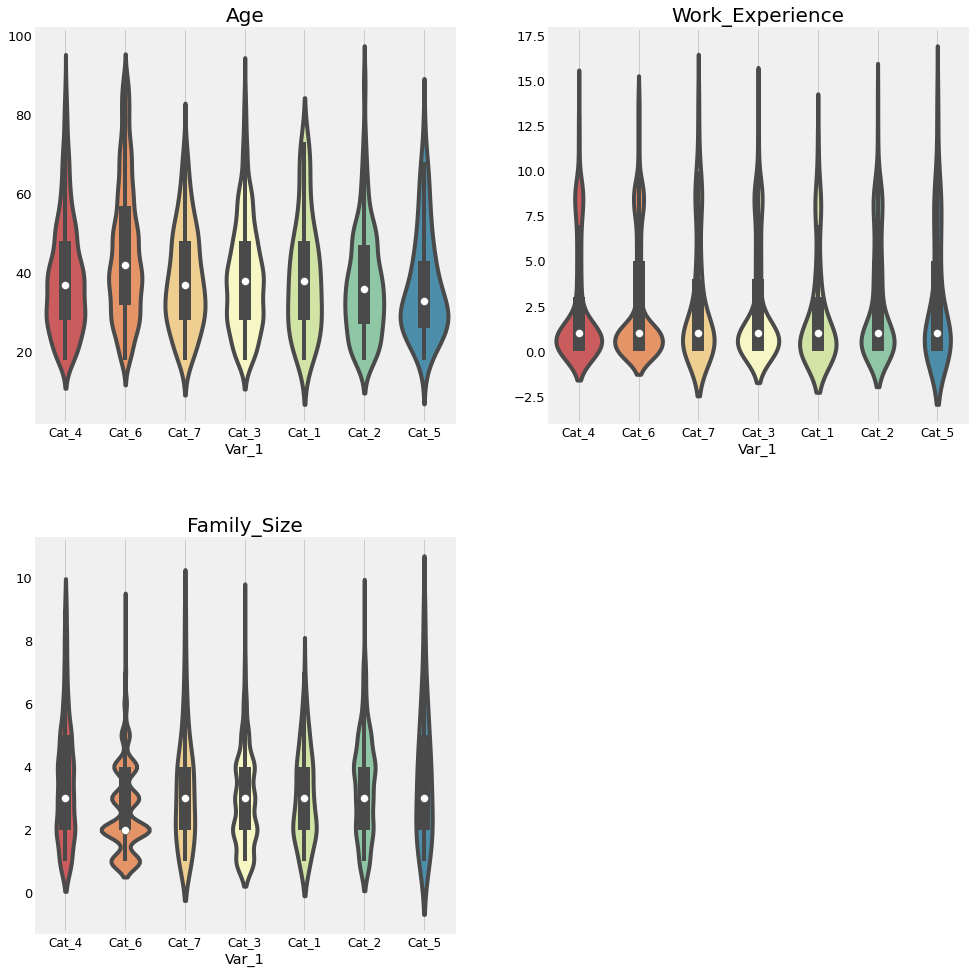

In [254]:
fig, ax = plt.subplots(figsize =(15, 15))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12

colors = sns.color_palette("Spectral", n_colors = 7).as_hex()

for i in (enumerate(numeric)):
    plt.subplot(2, 2, i[0]+1)
    sns.violinplot(x='Var_1', y=i[1], palette = colors, data=data)
    plt.xlabel('Var_1')
    plt.ylabel('')
    plt.yticks(fontsize=13, color='black')
    plt.title(i[1], fontsize=20, color='black')
    plt.tight_layout(pad=5.0)
    plt.grid(b=None)

# **PROCESSING DATA**

**Kiểm tra các giá trị NULL:**

Đối với các feature: *Ever_Married*, *Graduated*, *Profession*, *Var_1*, ta sẽ sử dụng phương pháp *One-hot Encoding* nhằm bảo toàn dữ liệu cũng như mối tương quan giữa các giá trị. Trước hết, ta cần thay thế các giá trị NULL ở các cột này bằng "Unknown".

In [255]:
data['Ever_Married'].fillna('Unknown', inplace = True)
data['Graduated'].fillna('Unknown', inplace = True)
data['Profession'].fillna('Unknown', inplace = True)
data['Var_1'].fillna('Unknown', inplace = True)

Đối với các feature: *Work_Experience*, *Family_Size*. Đây đều là các feature dạng numeric có tỉ lệ NULL thấp. Ta sẽ sử dụng phương pháp thay thế để xử lý các giá trị NULL.

In [256]:
data['Work_Experience'].value_counts()

1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64

In [257]:
data['Family_Size'].value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

Đối với các feature dạng numeric như *Work_Experience* và *Family_Size*, ta sẽ thay thế các giá trị NULL bằng giá trị trung vị của cột.



In [258]:
data['Work_Experience'].fillna(data['Work_Experience'].median(), inplace=True)
data['Family_Size'].fillna(data['Family_Size'].median(), inplace=True)

**Xử lý kiểu dữ liệu object:**

In [259]:
data.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object

Đối với feature *Gender*, ta không cần sử dụng phương pháp *One-hot Encoding* bởi cột này chỉ có 2 giá trị đặc biệt và không có giá trị NULL. Ta sẽ thay thế Male = 0, Female = 1.

In [260]:
data['Gender'] = data['Gender'].replace('Male', 0)
data['Gender'] = data['Gender'].replace('Female', 1)

Đối với feature *Spending_Score*, ta không cần sử dụng phương pháp *One-hot Encoding* bởi cột này chỉ có 3 giá trị đặc biệt và không có giá trị NULL. Ngoài ra, các giá trị của cột này có mối tương quan tăng dần theo mức độ Low - Average - High. Vì vậy, ta sẽ thay thế Low = 1, Average = 2, High = 3.

In [261]:
data['Spending_Score'] = data['Spending_Score'].replace('Low', 1)
data['Spending_Score'] = data['Spending_Score'].replace('Average', 2)
data['Spending_Score'] = data['Spending_Score'].replace('High', 3)

Đối với các feature còn lại, ta sẽ sử dụng phương pháp *One-hot Encoding* như sau:

In [262]:
data = data.join(pd.get_dummies(data['Ever_Married'], prefix='Ever_Married'))
data = data.join(pd.get_dummies(data['Graduated'], prefix='Graduated'))
data = data.join(pd.get_dummies(data['Profession'], prefix='Profession'))
# data = data.join(pd.get_dummies(data['Var_1'], prefix='Var_1'))

Sau đó, ta xóa các cột có kiểu object ra khỏi tập dữ liệu.

In [263]:
data = data.drop('Ever_Married',axis = 1)
data = data.drop('Graduated',axis = 1)
data = data.drop('Profession',axis = 1)
data = data.drop('Var_1',axis = 1)

Dữ liệu mới như sau:

In [264]:
data

,Gender,Age,Work_Experience,Spending_Score,Family_Size,Ever_Married_No,Ever_Married_Unknown,Ever_Married_Yes,Graduated_No,Graduated_Unknown,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Unknown
0,0,22,1.0,1,4.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,38,1.0,2,3.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,1,67,1.0,1,1.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,67,0.0,3,2.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1,40,1.0,3,6.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,0,22,0.0,1,7.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
8064,0,35,3.0,1,4.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8065,1,33,1.0,1,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8066,1,27,1.0,1,4.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


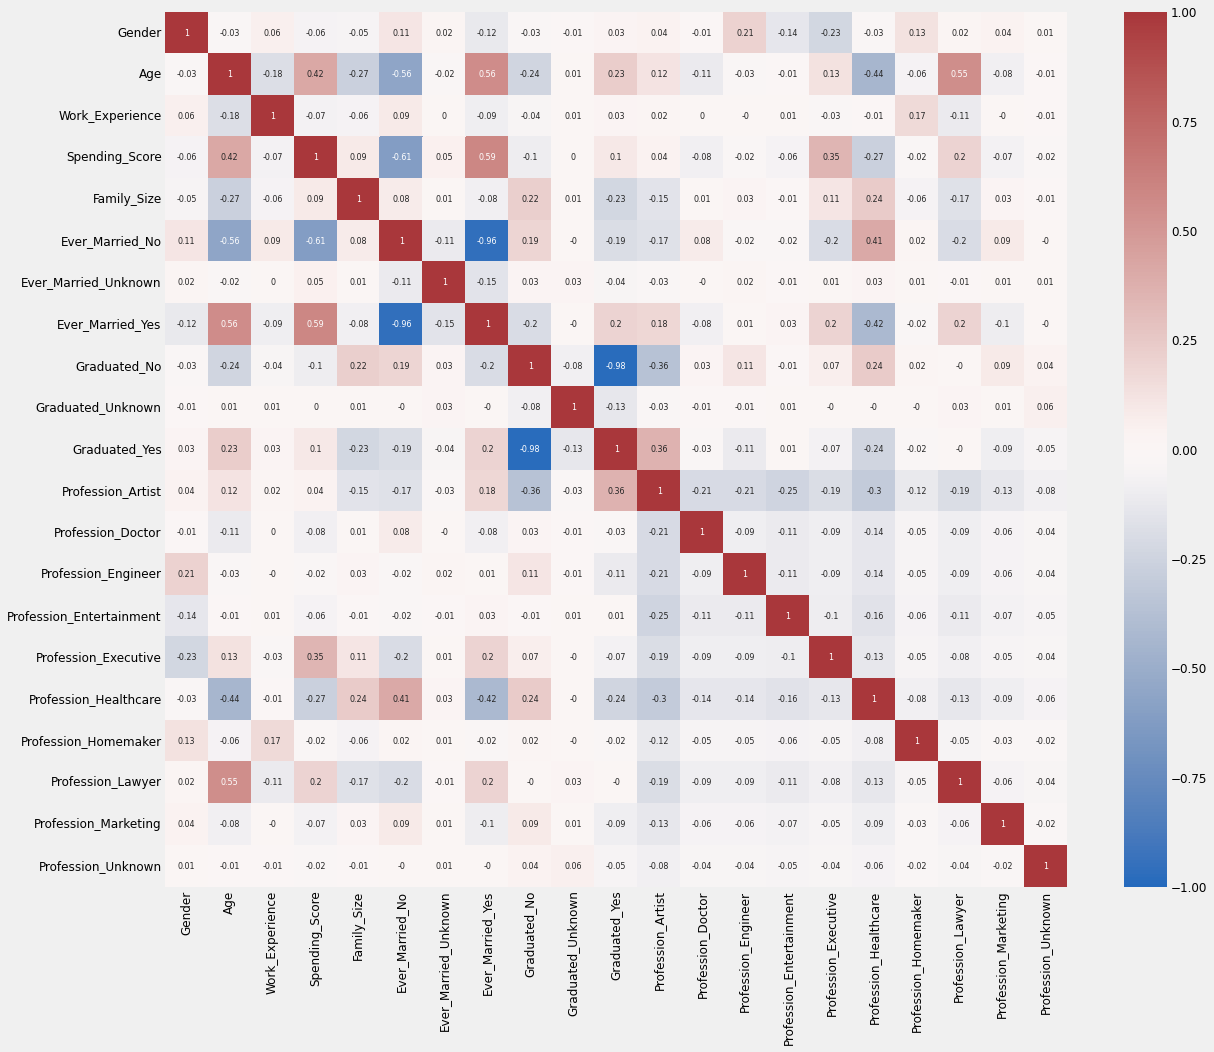

In [282]:
plt.figure(figsize=(18,15))
correlations = data.corr()
sns.heatmap(round(correlations,2), cmap='vlag', annot=True, 
            annot_kws={"size": 8}, vmin=-1, vmax=1);

In [266]:
def normalize(a):
  return (a - a.min()) / (a.max() - a.min())
for column in data.columns:
    if data[column].max() > 1:
        data[column] = normalize(data[column])
data

,Gender,Age,Work_Experience,Spending_Score,Family_Size,Ever_Married_No,Ever_Married_Unknown,Ever_Married_Yes,Graduated_No,Graduated_Unknown,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Unknown
0,0,0.056338,0.071429,0.0,0.375,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0.281690,0.071429,0.5,0.250,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,1,0.690141,0.071429,0.0,0.000,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,0.690141,0.000000,1.0,0.125,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1,0.309859,0.071429,1.0,0.625,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,0,0.056338,0.000000,0.0,0.750,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
8064,0,0.239437,0.214286,0.0,0.375,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8065,1,0.211268,0.071429,0.0,0.000,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8066,1,0.126761,0.071429,0.0,0.375,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


# **CLUSTERING**

## **Choosing k**

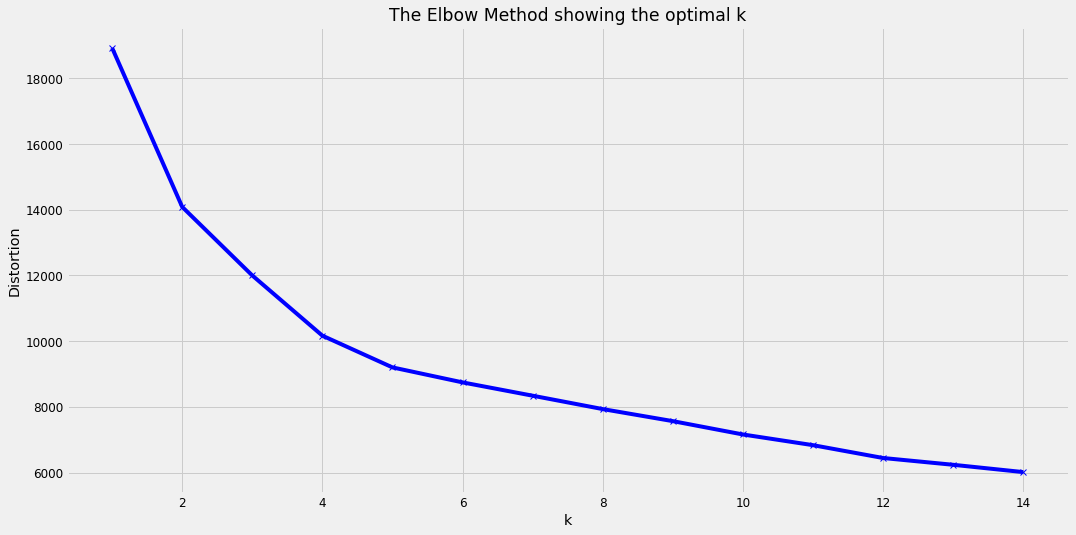

In [273]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Chọn k = 5

## **Clustering**

In [274]:
kmeansmodel = KMeans(n_clusters = 5, init = 'k-means++', random_state = 10, max_iter = 100)
ymeans= kmeansmodel.fit_predict(data)

In [276]:
df = pd.DataFrame(ymeans, columns = ['Column_A'])

In [283]:
data

,Gender,Age,Work_Experience,Spending_Score,Family_Size,Ever_Married_No,Ever_Married_Unknown,Ever_Married_Yes,Graduated_No,Graduated_Unknown,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Unknown
0,0,0.056338,0.071429,0.0,0.375,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0.281690,0.071429,0.5,0.250,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,1,0.690141,0.071429,0.0,0.000,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,0.690141,0.000000,1.0,0.125,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1,0.309859,0.071429,1.0,0.625,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,0,0.056338,0.000000,0.0,0.750,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
8064,0,0.239437,0.214286,0.0,0.375,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8065,1,0.211268,0.071429,0.0,0.000,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8066,1,0.126761,0.071429,0.0,0.375,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [277]:
df['Column_A'].value_counts()

4    1739
1    1694
3    1642
0    1593
2    1400
Name: Column_A, dtype: int64

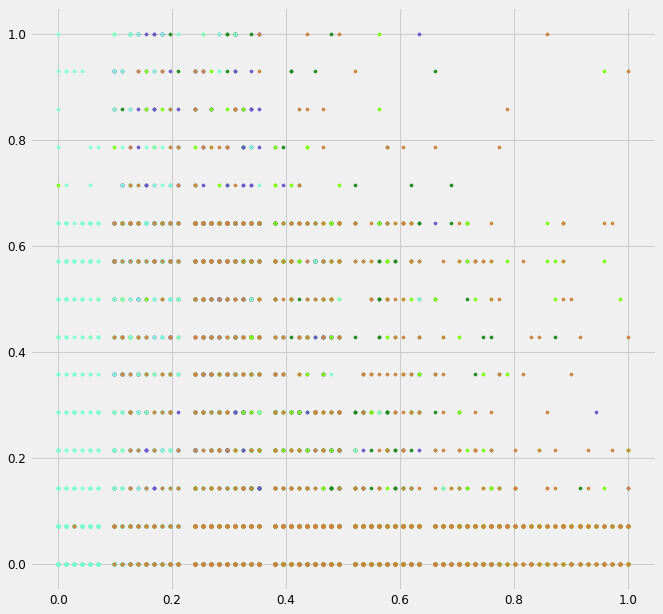

In [290]:
plt.scatter(data['Age'][ymeans == 0], data['Work_Experience'][ymeans == 0], s=10, color = 'forestgreen')
plt.scatter(data['Age'][ymeans == 1], data['Work_Experience'][ymeans == 1], s=10, color = 'slateblue')
plt.scatter(data['Age'][ymeans == 2], data['Work_Experience'][ymeans == 2], s=10, color = 'lawngreen')
plt.scatter(data['Age'][ymeans == 3], data['Work_Experience'][ymeans == 3], s=10, color = 'aquamarine')
plt.scatter(data['Age'][ymeans == 4], data['Work_Experience'][ymeans == 4], s=10, color = 'peru')
plt.show()


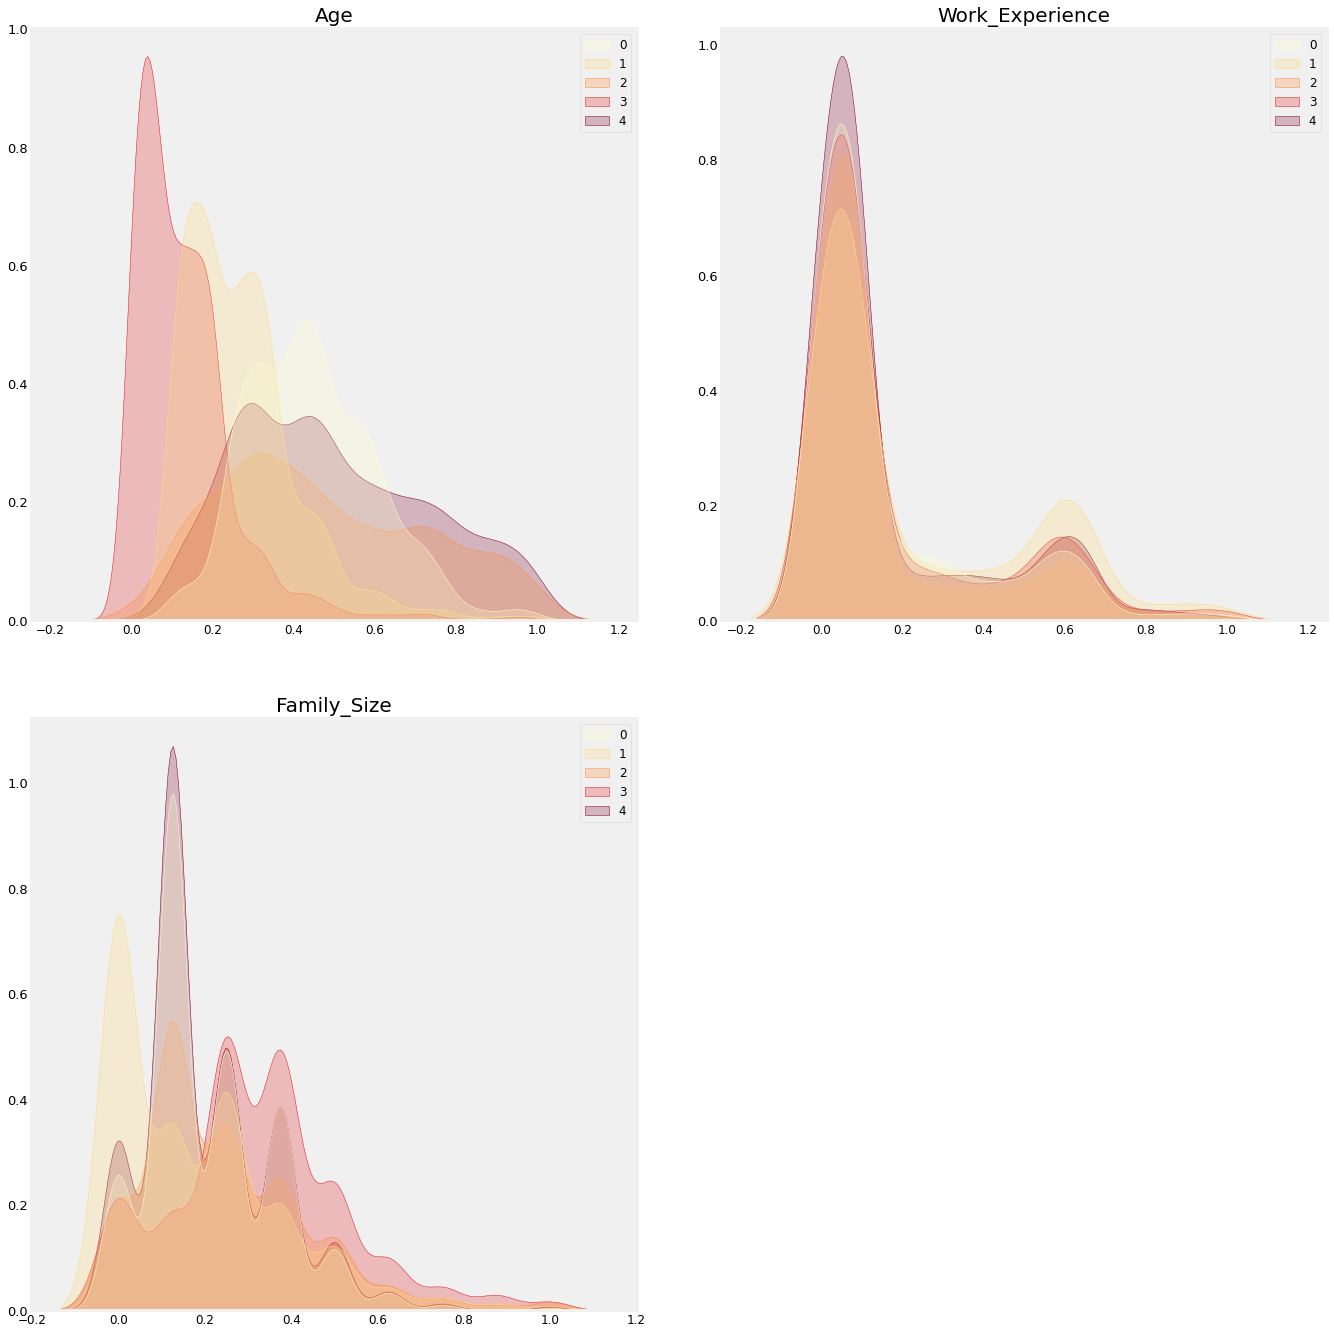

In [291]:
fig, ax = plt.subplots(figsize =(20, 20))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12

for i in (enumerate(numeric)):
    plt.subplot(2, 2, i[0]+1)
    sns.kdeplot(x = i[1], data = data, palette = "YlOrRd", fill=True, hue = ymeans)
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=13, color='black')
    # plt.box(False)
    plt.title(i[1], fontsize=20, color='black')
    plt.tight_layout(pad=5.0)
    plt.grid(b=None)